# Exploratory Data Analysis

In this notebook, we analyze the different parameters of our dataset and how it can be used in order to prediction of views which is our main use case. We will first begin by checking the distributions of different variables in the dataset.

In [1]:
import csv
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
import pandas as pd
from sklearn import decomposition
import numpy as np

In [15]:
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/Final Assignments/Docker/data/test/"

userspath=MAINPATH+"uploaderprofile.csv"
videospath=MAINPATH+"videonodes.csv"
userrelationships=MAINPATH+"uploaderlinks.csv"
videosrelationships=MAINPATH+"relatedlinks.csv"



'''
-rw-r--r-- 1 visha 197609  78 Aug 12 01:42 node_header.csv
-rw-r--r-- 1 visha 197609  38 Aug 12 01:42 rel_links_header.csv
-rw-r--r-- 1 visha 197609  31 Aug 12 01:43 uploaderlinks_header.csv
-rw-r--r-- 1 visha 197609  41 Aug 12 01:49 uploaderprofile_header.csv
-rw-r--r-- 1 visha 197609 255 Aug 12 01:52 uploaderprofile.csv
-rw-r--r-- 1 visha 197609 288 Aug 12 01:52 uploaderlinks.csv
-rw-r--r-- 1 visha 197609 225 Aug 12 01:52 relatedlinks.csv
-rw-r--r-- 1 visha 197609 660 Aug 12 01:53 videonodes.csv
'''

'\n-rw-r--r-- 1 visha 197609  78 Aug 12 01:42 node_header.csv\n-rw-r--r-- 1 visha 197609  38 Aug 12 01:42 rel_links_header.csv\n-rw-r--r-- 1 visha 197609  31 Aug 12 01:43 uploaderlinks_header.csv\n-rw-r--r-- 1 visha 197609  41 Aug 12 01:49 uploaderprofile_header.csv\n-rw-r--r-- 1 visha 197609 255 Aug 12 01:52 uploaderprofile.csv\n-rw-r--r-- 1 visha 197609 288 Aug 12 01:52 uploaderlinks.csv\n-rw-r--r-- 1 visha 197609 225 Aug 12 01:52 relatedlinks.csv\n-rw-r--r-- 1 visha 197609 660 Aug 12 01:53 videonodes.csv\n'

In [2]:
MAINPATH="C:/Users/visha/Desktop/MSIS/Advanced Data Science/Assignments/Final Assignments/Docker/data/"

userspath=MAINPATH+"UserFileCombined_clean.csv"
videospath=MAINPATH+"MainFileCombined_clean.csv"
userrelationships=MAINPATH+"UserUploads.csv"
videosrelationships=MAINPATH+"VideoRelationships.csv"

userstatistics=

logfilepath=MAINPATH+"logs.txt"

In [ ]:
pd.read_csv()

In [5]:
videoNodes_df=pd.read_csv(videospath,names=['videoID','userID','videoAge','category','length','views','rating','numberRatings','comments'])

C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
videoNodes_df=pd.read_csv(videospath)

C:\Users\visha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
relatedLinks_df=pd.read_csv(videosrelationships,names=['videoID','relatedVideoID'])

In [3]:
relatedLinks_df=pd.read_csv(videosrelationships)

In [4]:
videoNodes_df.head()

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0
1,7D0Mf4Kn4Xk,periurban,583.0,Music,201.0,6508.0,4.19,687.0,312.0
2,n1cEq1C8oqQ,Pipistrello,525.0,Comedy,125.0,1687.0,4.01,363.0,141.0
3,SDNkMu8ZT68,w00dy911,630.0,People & Blogs,186.0,10181.0,3.49,494.0,257.0
4,sRnLdmvQBsI,pdrop,735.0,Entertainment,188.0,67265.0,3.09,302.0,262.0


In [8]:
videoNodes_df.count()

videoID          7233002
userID           7025500
videoAge         7233002
category         7025500
length           7233002
views            7233002
rating           7233002
numberRatings    7233002
comments         7233002
dtype: int64

In [6]:
userNodes_df=pd.read_csv(userspath,encoding="ISO-8859-1")

In [7]:
userNodes_df.head()

,userID,uploads,friends
0,0000000000000000hate,4.0,0.0
1,0000000000000000iraq,18.0,0.0
2,000000000000000news,13.0,0.0
3,00000000000000music,11.0,0.0
4,00000000000000muslim,9.0,0.0


In [9]:
merged_df = pd.merge(videoNodes_df, userNodes_df, on=['userID'])

In [22]:
merged_df.head()

,videoID,userID,videoAge,category,length,views,rating,numberRatings,comments,uploads,friends
0,LKh7zAJ4nwo,TheReceptionist,653.0,Entertainment,424.0,13021.0,4.34,1305.0,744.0,31.0,1952.0
1,y5kwKp6y8t4,TheReceptionist,713.0,Entertainment,204.0,2137.0,4.61,70.0,64.0,31.0,1952.0
2,oHknurFKx64,TheReceptionist,616.0,Entertainment,53.0,11056.0,3.83,81.0,47.0,31.0,1952.0
3,0vdG-FwpulQ,TheReceptionist,650.0,Entertainment,187.0,199523.0,4.34,1249.0,563.0,31.0,1952.0
4,luWqWuBIQ50,TheReceptionist,664.0,Entertainment,291.0,4015.0,4.83,161.0,169.0,31.0,1952.0


In [27]:
merged_df[['videoID','views']].sort('views',ascending=False)

C:\Users\visha\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,videoID,views
3069384,dMH0bHeiRNg,79897120.0
1280518,cQ25-glGRzI,77674728.0
3763385,12Z3J1uzd0Q,65341925.0
51783,LpAI8TzQDes,65078772.0
5251216,7AVHXe-ol-s,60349673.0
3801153,244qR7SvvX0,57790943.0
964878,ePyRrb2-fzs,45984219.0
233940,xsRWpK4pf90,44614530.0
3861854,ktUSIJEiOug,43583367.0
1466268,b3u65f4CRLk,43511791.0


In [66]:
merged_df['views'].describe()

count    6.900967e+06
mean     2.084379e+04
std      1.751856e+05
min      0.000000e+00
25%      4.580000e+02
50%      2.049000e+03
75%      9.081000e+03
max      7.989712e+07
Name: views, dtype: float64

In [248]:
merged_df[['videoAge','category','length','views','rating','numberRatings']].describe()

,videoAge,length,views,rating,numberRatings
count,6.900967e+06,6.900967e+06,6.900967e+06,6.900967e+06,6.900967e+06
mean,8.076705e+02,2.282384e+02,2.084379e+04,3.734800e+00,4.295905e+01
std,2.359431e+02,9.503221e+03,1.751856e+05,1.731869e+00,4.361516e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.420000e+02,7.500000e+01,4.580000e+02,3.330000e+00,2.000000e+00
50%,7.740000e+02,1.800000e+02,2.049000e+03,4.590000e+00,6.000000e+00
75%,1.010000e+03,2.770000e+02,9.081000e+03,4.970000e+00,2.100000e+01
max,1.236000e+03,1.228398e+07,7.989712e+07,5.000000e+00,3.291080e+05


In [276]:
userNodes_df[['uploads','friends']].describe()

,uploads,friends
count,2.792603e+06,2.792603e+06
mean,1.557786e+01,1.502531e+01
std,8.559105e+01,3.311222e+02
min,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00
50%,6.000000e+00,1.000000e+00
75%,1.500000e+01,5.000000e+00
max,8.622800e+04,2.412260e+05


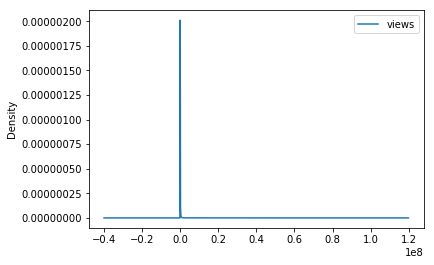

In [30]:
merged_df[['views']].plot.kde()
plt.show()

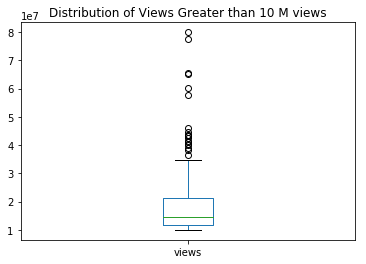

In [43]:
merged_df[merged_df['views']>10000000]['views'].plot(kind='box',title='Distribution of Views Greater than 10 M views')
plt.show()

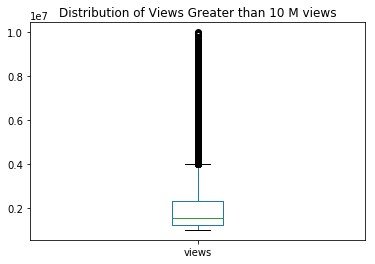

In [45]:
merged_df[(merged_df['views']>1000000) & (merged_df['views']<10000000)]['views'].plot(kind='box',title='Distribution of Views Greater than 10 M views')
plt.show()

In [243]:
merged_df[(merged_df['views']>1000000) & (merged_df['views']<10000000)]['views'].plot(kind='bar',title='Distribution of Views Greater than 10 M views')
plt.yscale('log', nonposy='clip')
plt.show()

KeyboardInterrupt: 

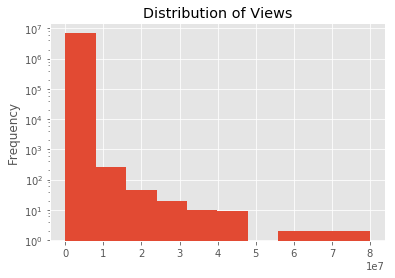

In [266]:
merged_df[(merged_df['views']<80000000)&(merged_df['views']>0)]['views'].plot.hist(by=None, title="Distribution of Views")
plt.yscale('log', nonposy='clip')
plt.show()


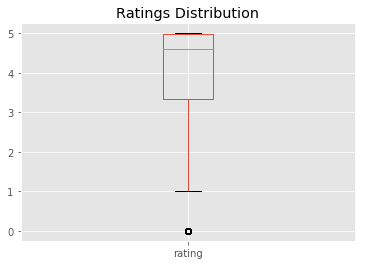

In [267]:
merged_df['rating'].plot(kind='box',title="Ratings Distribution")
plt.show()

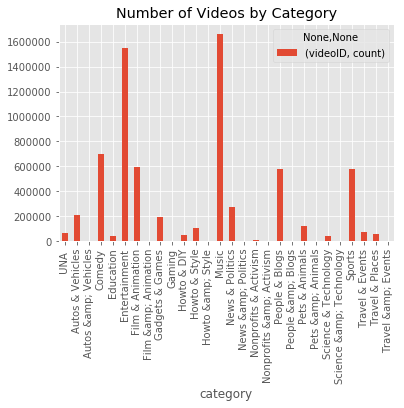

In [268]:
catdf=merged_df[['videoID','category']].groupby(['category']).agg(['count']).plot(kind='bar',title="Number of Videos by Category")
plt.show()

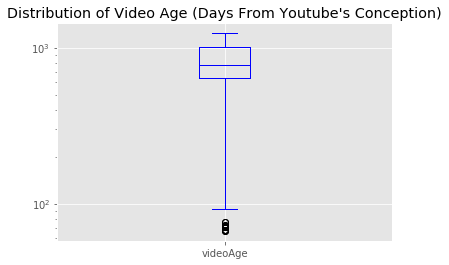

In [270]:
merged_df['videoAge'].plot(kind='box',color='blue',title="Distribution of Video Age (Days From Youtube's Conception)")
plt.yscale('log', nonposy='clip')
plt.show()

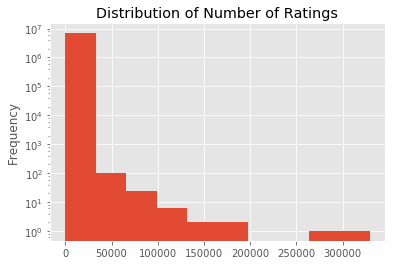

In [271]:
merged_df['numberRatings'].plot(kind='hist',title="Distribution of Number of Ratings")
plt.yscale('log', nonposy='clip')
plt.show()

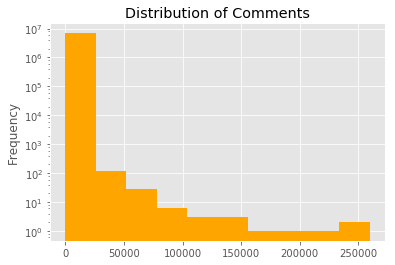

In [272]:
merged_df['comments'].plot(kind='hist',color='orange',title="Distribution of Comments")
plt.yscale('log', nonposy='clip')
plt.show()

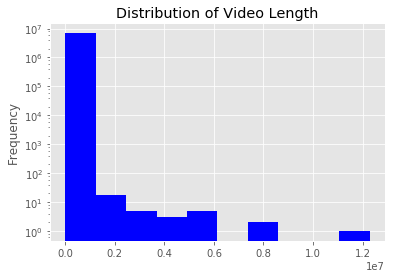

In [273]:
merged_df['length'].plot(kind='hist',color='blue',title='Distribution of Video Length')
plt.yscale('log', nonposy='clip')
plt.show()

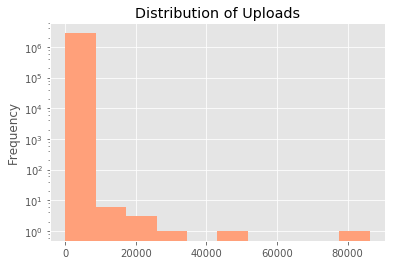

In [277]:
userNodes_df.uploads.plot(kind='hist',color='lightsalmon',title='Distribution of Uploads')
plt.yscale('log', nonposy='clip')
plt.show()

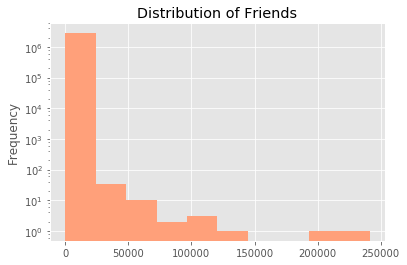

In [281]:
userNodes_df.friends.plot(kind='hist',color='lightsalmon',title='Distribution of Friends')
plt.yscale('log', nonposy='clip')
plt.show()

In [ ]:
pd.DataFrame(catdf.iloc[:,0],columns =['Category','Number of Videos'])

In [ ]:
np.random.seed(42)

values = 10 ** np.random.uniform(-3, 3, size=100)

fig = plt.figure(figsize=(9, 3))


ax = plt.subplot(1, 3, 1)

ax.boxplot(np.log10(values))
ax.set_yticks(np.arange(-3, 4))
ax.set_yticklabels(10.0**np.arange(-3, 4))
ax.set_title('log')

ax = plt.subplot(1, 3, 2)

ax.boxplot(values)
ax.set_yscale('log')
ax.set_title('raw')

ax = plt.subplot(1, 3, 3)

ax.boxplot(values, whis=[5, 95])
ax.set_yscale('log')
ax.set_title('5%')

plt.show()

In [10]:
merged_df.count()

videoID          6900967
userID           6900967
videoAge         6900967
category         6900967
length           6900967
views            6900967
rating           6900967
numberRatings    6900967
comments         6900967
uploads          6900967
friends          6900967
dtype: int64

In [4]:
relatedLinks_df.head()

,videoID,relatedVideoID
0,LKh7zAJ4nwo,DjdA-5oKYFQ
1,LKh7zAJ4nwo,NxTDlnOuybo
2,LKh7zAJ4nwo,c-8VuICzXtU
3,LKh7zAJ4nwo,DH56yrIO5nI
4,LKh7zAJ4nwo,W1Uo5DQTtzc


In [22]:
G = nx.from_pandas_dataframe(relatedLinks_df, 'videoID', 'relatedVideoID', edge_attr=None, create_using=None)

In [23]:
print(G.nodes())

['LKh7zAJ4nwo', 'H-ucblRMjuY', 'n1cEq1C8oqQ', 'NxTDlnOuybo', 'c-8VuICzXtU', 'DH56yrIO5nI', 'sRnLdmvQBsI', 'W1Uo5DQTtzc', 'E-3zXq_r4w0', 'yAr26YhuYNY', 'fQShwYqGqsw']


In [25]:
 pd.Series(videoNodes_df.videoID).to_dict()

{0: 'LKh7zAJ4nwo',
 1: '7D0Mf4Kn4Xk',
 2: 'n1cEq1C8oqQ',
 3: 'SDNkMu8ZT68',
 4: 'sRnLdmvQBsI',
 5: 'fQShwYqGqsw',
 6: 'mWzdp7Cg41w',
 7: '-keC9GymLpI',
 8: 'H-ucblRMjuY'}

In [24]:
nx.set_node_attributes(G, 'videoID', pd.Series(videoNodes_df.videoID).to_dict())
nx.set_node_attributes(G, 'userID', pd.Series(videoNodes_df.userID).to_dict())
nx.set_node_attributes(G, 'videoAge', pd.Series(videoNodes_df.videoAge).to_dict())
nx.set_node_attributes(G, 'userID', pd.Series(videoNodes_df.userID).to_dict())
nx.set_node_attributes(G, 'category', pd.Series(videoNodes_df.category).to_dict())

KeyError: 0

In [ ]:
G = nx.DiGraph()
G = nx.from_pandas_dataframe(relatedLinks_df, 'videoID', 'relatedVideoID', edge_attr=None, create_using=nx.DiGraph())

In [ ]:
G = nx.DiGraph()
G = nx.from_pandas_dataframe(relatedLinks_df, 'videoID', 'relatedVideoID', edge_attr=None, create_using=nx.DiGraph())
skip=False
with open(videospath) as f:
    node_list = csv.reader(f)
    with open(logfilepath,'w') as fil:
        for row in node_list:
            if skip==False:
                skip=True
                continue
            else:
                try:
                    G.node[row[0]]['userID']=row[1]
                    G.node[row[0]]['videoAge']=row[2]
                    G.node[row[0]]['category']=row[3]
                except:
                    fil.write(row[0]+",")qq


In [ ]:
G.number_of_nodes()

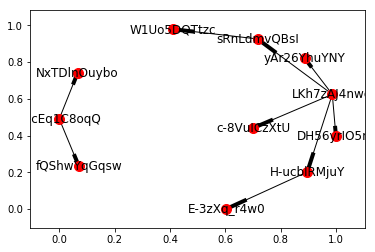

In [37]:
nx.draw_networkx(G,pos=nx.spring_layout(G),with_labels=True,node_size=100)
plt.show()

In [ ]:
g=nx.Graph()

#extract and add AGE_GROUP nodes in graph
f1 = csv.reader(open("videonodes.csv","rb"))
for row in f1: 
    g.add_nodes_from(row)
    nx.draw_circular(g,node_color='blue')

#extract and add COUNTRY nodes in graph
f2 = csv.reader(open('user_country.txt','rb'))
for row in f2:
    g.add_nodes_from(row) 
    nx.draw_circular(g,node_color='red')

#extract and add USER_ID nodes in graph
f3 = csv.reader(open('user_id.txt','rb'))
for row in f3:
    g.add_nodes_from(row)
    nx.draw_random(g,node_color='yellow')

print g.nodes()
plt.savefig("path.png")
print g.number_of_nodes()
plt.show()

In [4]:
'''
Storing the return result into RDD
'''
from neo4j.v1 import GraphDatabase, basic_auth

driver = GraphDatabase.driver("bolt://localhost:7687", auth=basic_auth("neo4j", "neo4j"))
session = driver.session()

session = driver.session()
result = session.run('MATCH (n:Person)-[r:FOLLOWS]->(o:Person) RETURN  o.name As id LIMIT 10')  
session.close()

print(result)

'''
Pulling the keys
'''
keys = result.peek().keys()

'''
Reading all the property values and storing it in a list
'''
values=list()

for record in result:
    rec= list()
    for key in keys:
        rec.append(record[key])
    values.append(rec)

'''
Converting list of values into a pandas dataframe
'''
df = DataFrame(values, columns=keys)     
print(df)

'''
Converting the pandas DataFrame to Spark DataFrame
'''  
sqlCtx = SQLContext(sc)
spark_df = sqlCtx.createDataFrame(df)

print(spark_df.show())

'''
Converting the Pandas DataFrame to SparkRdd (via Spark Dataframes)
'''
rdd = spark_df.rdd.map(tuple)

print(rdd.take(10))

NameError: name 'driver' is not defined

In [17]:
df=pd.read_csv(userrelationships)

In [9]:
df.head()

,videoID,userID
0,LKh7zAJ4nwo,TheReceptionist
1,7D0Mf4Kn4Xk,periurban
2,n1cEq1C8oqQ,Pipistrello
3,SDNkMu8ZT68,w00dy911
4,sRnLdmvQBsI,pdrop


In [13]:
df[df['userID'].isnull()]

,videoID,userID
273,NQsx7x11cig,NaN
358,Nhar79reBbQ,NaN
363,YtlYriAEnXA,NaN
693,q2vEFK72xUM,NaN
700,NV5_3eMFPT8,NaN
733,qt35LNzcMTc,NaN
808,G4SF9LCNpFI,NaN
812,dUbFHelEu74,NaN
816,zTPSfCyrFjw,NaN
821,p_cNfr7dff4,NaN


In [18]:
df.dropna(inplace=True)

In [19]:
df[df['userID'].isnull()]

,videoID,userID
